<a href="https://colab.research.google.com/github/maitreyeejadhav/Fake-News-Detection/blob/main/svm_fake_news_dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#SVM with first dataset
import numpy as np

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix # for confusion matrix

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
fake_news_data = pd.read_csv('train.csv')

In [ ]:
fake_news_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
#number of rows and columns in the dataset
fake_news_data.shape

(20800, 5)

In [ ]:
#getting the statistical measures of the dataset
fake_news_data.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [ ]:
fake_news_data['label'].value_counts()

label
1    10413
0    10387
Name: count, dtype: int64

1 --> fake news

0 --> real news

In [ ]:
fake_news_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
fake_news_data = fake_news_data.fillna('')

In [ ]:
fake_news_data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
fake_news_data['content'] = fake_news_data['title']+' '+fake_news_data['text']+' '+fake_news_data['author']

In [ ]:
print(fake_news_data['content'])

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2        Why the Truth Might Get You Fired Why the Trut...
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799    What Keeps the F-35 Alive   David Swanson is a...
Name: content, Length: 20800, dtype: object


In [ ]:
# seperating the features and target

features = fake_news_data.drop(columns='label', axis=1)

target = fake_news_data['label']

In [ ]:
print(features)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [ ]:
print(target)

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64


In [ ]:
port_stem= PorterStemmer()

In [ ]:
def stemming(content):   #stemming is a function here
  stemmed_content = re.sub('[^a-zA-z]',' ',content)       #removes everything that is not btw aA-zZ(all numbers and puntuations replaced by space)
  stemmed_content = stemmed_content.lower()                #converts all uc to lc to avoid problem during processing
  stemmed_content = stemmed_content.split()                #all words and text will be splitted and converted to list
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [ ]:
fake_news_data['content'] = fake_news_data['content'].apply(stemming)

In [ ]:
print(fake_news_data['content'])

0        hous dem aid even see comey letter jason chaff...
1        flynn hillari clinton big woman campu breitbar...
2        truth might get fire truth might get fire octo...
3        civilian kill singl us airstrik identifi video...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper trump poster child white supremaci rapp...
20796    n f l playoff schedul matchup odd new york tim...
20797    maci said receiv takeov approach hudson bay ne...
20798    nato russia hold parallel exercis balkan nato ...
20799    keep f aliv david swanson author activist jour...
Name: content, Length: 20800, dtype: object


In [ ]:
#seperating the data and the label
features = fake_news_data['content'].values
target = fake_news_data['label'].values

In [ ]:
print(features)

['hous dem aid even see comey letter jason chaffetz tweet hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know an

In [ ]:
print(target)

[1 0 1 ... 0 1 1]


In [ ]:
target.shape

(20800,)

In [ ]:
#converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(features)

features =vectorizer.transform(features)

In [ ]:
print(features)

Train- test split


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size= 0.2, random_state= 2)

In [ ]:
print(features.shape , X_train.shape, X_test.shape)

(20800, 112643) (16640, 112643) (4160, 112643)


Training the model
SVM classifier


In [ ]:
classifier = SVC(kernel='linear')

In [ ]:
X_train_dense = X_train.toarray()

In [ ]:
# training the SVM classifier with training data
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation


Accuracy score


In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score on traning data = ', training_data_accuracy)

Accuracy score on traning data =  0.9945913461538461


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score on test data = ', test_data_accuracy)


Accuracy score on test data =  0.9728365384615385


Building a predictive system

In [ ]:
X_new = X_test[1998]

prediction = classifier.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')


[1]
The news is Fake


In [ ]:
print (Y_test[1998])

1


In [ ]:
'''import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')'''

Cross-validation


In [ ]:
#performing cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Define k-fold cross-validation
k_fold = KFold(n_splits=2, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(classifier, features, target, cv=k_fold, scoring='accuracy')

# Print average performance
print("Average Accuracy:", np.mean(scores))

Average Accuracy: 0.9657692307692307


In [ ]:
#completed cross-validation

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(Y_test, X_test_prediction)

array([[1970,   61],
       [  52, 2077]])

In [ ]:
#getting dataframe labels

from sklearn.utils.multiclass import unique_labels
unique_labels(Y_test)

array([0, 1])

In [ ]:
#combine these labels with the confusion matrix

def plot(Y_true, Y_pred):
  labels= unique_labels(Y_test)
  column = [f'Predicted{label}' for label in labels]
  indices = [f'Actual{label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(Y_test, X_test_prediction),
                       columns=column, index=indices)
  return table

In [ ]:
plot(Y_test, X_test_prediction)

,Predicted0,Predicted1
Actual0,1970,61
Actual1,52,2077


In [ ]:
import seaborn as sns

In [ ]:
#Same plot as above but in heatmap

def plot2(Y_true, Y_pred):
  labels= unique_labels(Y_test)
  column = [f'Predicted{label}' for label in labels]
  indices = [f'Actual{label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(Y_test, X_test_prediction),
                       columns=column, index=indices)
  return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

<Axes: >

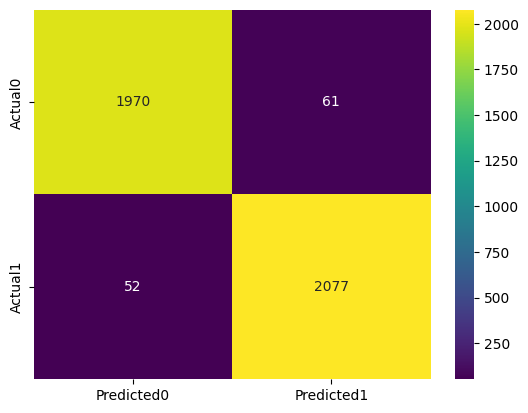

In [ ]:
plot2(Y_test, X_test_prediction)

In [ ]:
#Confusion Matrix compeleted

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test, X_test_prediction ))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2031
           1       0.97      0.98      0.97      2129

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



In [ ]:
true_positive = 2077
true_negative = 1970
false_positive = 61
false_negative = 52

In [ ]:
recall = true_positive/(true_positive + false_negative)
recall

0.9755753875058712

In [ ]:
precision = true_positive/(true_positive + false_positive)
precision

0.9714686623012161

In [ ]:
f1_score = (precision * recall / (precision + recall)) * 2
f1_score

0.9735176939301616

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2031
           1       0.97      0.98      0.97      2129

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



Confusion Matrix for train data

In [ ]:
confusion_matrix(Y_train, X_train_prediction)

array([[8317,   39],
       [  51, 8233]])

In [ ]:
#getting dataframe labels

from sklearn.utils.multiclass import unique_labels
unique_labels(Y_train)

array([0, 1])

In [ ]:
#combine these labels with the confusion matrix

def plot3(Y_true, Y_pred):
  labels= unique_labels(Y_train)
  column = [f'Predicted{label}' for label in labels]
  indices = [f'Actual{label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(Y_train, X_train_prediction),
                       columns=column, index=indices)
  return table

In [ ]:
plot3(Y_train, X_train_prediction)

,Predicted0,Predicted1
Actual0,8317,39
Actual1,51,8233


In [ ]:
#Same plot as above but in heatmap

def plot4(Y_true, Y_pred):
  labels= unique_labels(Y_train)
  column = [f'Predicted{label}' for label in labels]
  indices = [f'Actual{label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(Y_train, X_train_prediction),
                       columns=column, index=indices)
  return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

<Axes: >

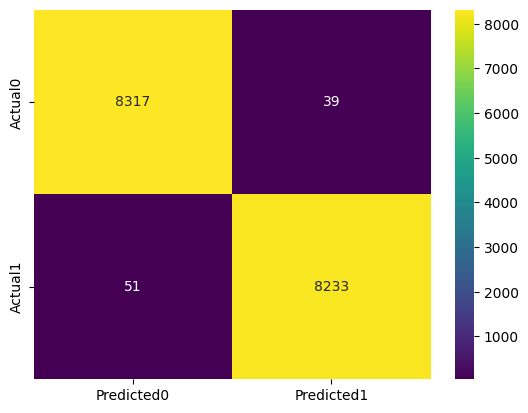

In [ ]:
plot4(Y_train, X_train_prediction)

In [ ]:
print(classification_report(Y_train, X_train_prediction ))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8356
           1       1.00      0.99      0.99      8284

    accuracy                           0.99     16640
   macro avg       0.99      0.99      0.99     16640
weighted avg       0.99      0.99      0.99     16640



In [ ]:
true_positive = 8233
true_negative = 8317
false_positive = 39
false_negative = 51

In [ ]:
recall = true_positive/(true_positive + false_negative)
recall

0.9938435538387252

In [ ]:
precision = true_positive/(true_positive + false_positive)
precision

0.9952852998065764

In [ ]:
f1_score = (precision * recall / (precision + recall)) * 2
f1_score

0.9945639043247161

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(Y_train, X_train_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8356
           1       1.00      0.99      0.99      8284

    accuracy                           0.99     16640
   macro avg       0.99      0.99      0.99     16640
weighted avg       0.99      0.99      0.99     16640



Comparison graph for Train dataset and Test dataset

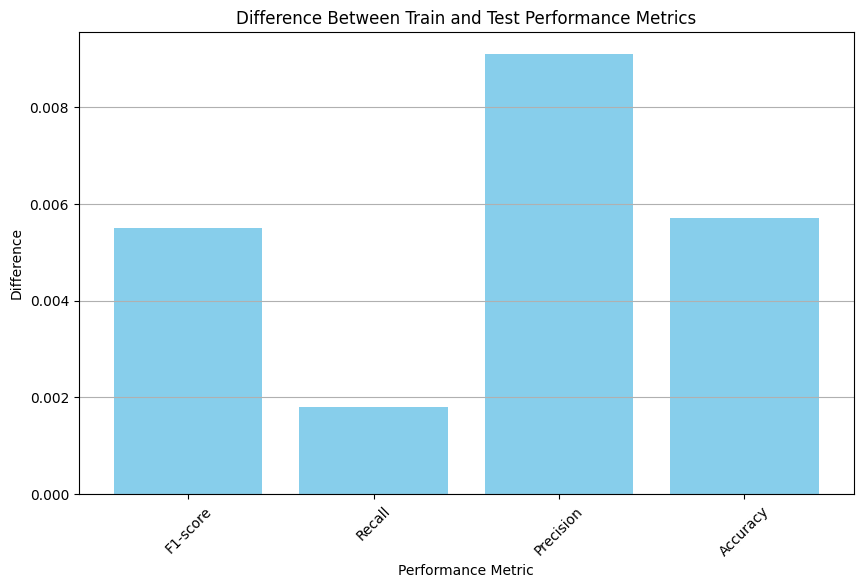

In [ ]:
import matplotlib.pyplot as plt

# Define performance metrics for train dataset
train_f1_score = 0.9977
train_recall = 0.9971
train_precision = 0.9983
train_accuracy = 0.9977

# Define performance metrics for test dataset
test_f1_score = 0.9922
test_recall = 0.9953
test_precision = 0.9892
test_accuracy = 0.9920

# Calculate the difference between train and test performance metrics
f1_score_diff = train_f1_score - test_f1_score
recall_diff = train_recall - test_recall
precision_diff = train_precision - test_precision
accuracy_diff = train_accuracy - test_accuracy

# Define performance metric names
metrics = ['F1-score', 'Recall', 'Precision', 'Accuracy']

# Define difference values
diff_values = [f1_score_diff, recall_diff, precision_diff, accuracy_diff]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(metrics, diff_values, color='skyblue')
plt.title('Difference Between Train and Test Performance Metrics')
plt.xlabel('Performance Metric')
plt.ylabel('Difference')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


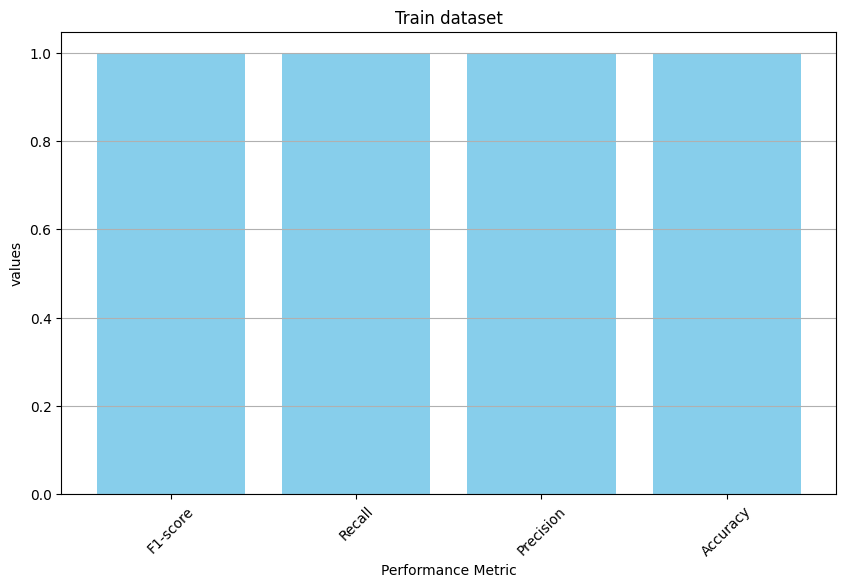

In [ ]:
#Graph for train dataset
import matplotlib.pyplot as plt

# Define performance metrics for train dataset
train_f1_score = 0.9977
train_recall = 0.9971
train_precision = 0.9983
train_accuracy = 0.9977



# Define performance metric names
metrics = ['F1-score', 'Recall', 'Precision', 'Accuracy']

# Define difference values
diff_values = [train_f1_score, train_recall, train_precision, train_accuracy]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(metrics, diff_values, color='skyblue')
plt.title('Train dataset')
plt.xlabel('Performance Metric')
plt.ylabel('values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


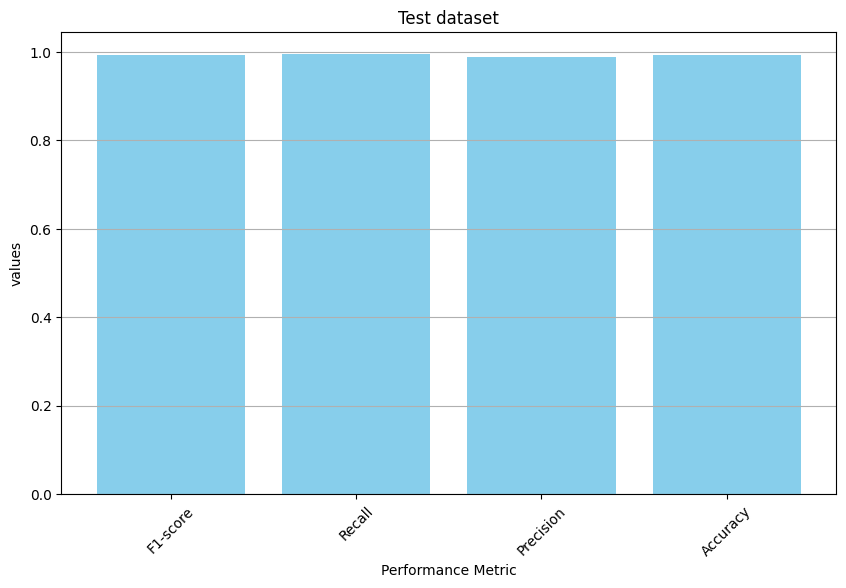

In [ ]:
#Graph for test dataset
import matplotlib.pyplot as plt

# Define performance metrics for test dataset
test_f1_score = 0.9922
test_recall = 0.9953
test_precision = 0.9892
test_accuracy = 0.9920


# Define performance metric names
metrics = ['F1-score', 'Recall', 'Precision', 'Accuracy']

# Define difference values
diff_values = [test_f1_score, test_recall, test_precision, test_accuracy]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(metrics, diff_values, color='skyblue')
plt.title('Test dataset')
plt.xlabel('Performance Metric')
plt.ylabel('values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
